In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [2]:
import numpy as np
from numpy.linalg import norm
import os
import pickle

# Feature  Extraction

In [3]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

In [4]:
model=tf.keras.Sequential([
    model,
    GlobalMaxPooling2D(),
   
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


customizing Model 

In [5]:

model.add(Dense(1056, activation='relu'))
model.add(Dropout(0.4)) 
model.add(Dense(3150, activation='relu'))
model.add(Dropout(0.43)) 
model.add(Dense(1450, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(1242, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(2048, activation='sigmoid'))  # Adjust num_classes based on your task



In [6]:
img=image.load_img("mydata/1d21cf3bd7ea8e6b9a0445cdbe9d78ac.jpg",target_size=(224,224))

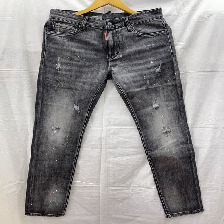

In [7]:
img

In [8]:
img_array=image.img_to_array(img)

In [9]:
img_array.shape

(224, 224, 3)

In [10]:
expanded_img_array=np.expand_dims(img_array,axis=0)
expanded_img_array.shape

(1, 224, 224, 3)

In [11]:
expanded_img_array

array([[[[242., 238., 235.],
         [242., 238., 235.],
         [240., 239., 235.],
         ...,
         [251., 253., 252.],
         [251., 253., 252.],
         [251., 253., 252.]],

        [[245., 241., 238.],
         [243., 239., 236.],
         [236., 235., 231.],
         ...,
         [251., 253., 252.],
         [251., 253., 252.],
         [251., 253., 252.]],

        [[237., 233., 230.],
         [238., 234., 231.],
         [235., 234., 230.],
         ...,
         [251., 253., 252.],
         [251., 253., 252.],
         [251., 253., 252.]],

        ...,

        [[218., 206., 192.],
         [219., 207., 193.],
         [218., 206., 192.],
         ...,
         [202., 194., 191.],
         [184., 176., 173.],
         [197., 189., 186.]],

        [[217., 205., 191.],
         [218., 206., 192.],
         [219., 207., 193.],
         ...,
         [215., 207., 204.],
         [179., 171., 168.],
         [202., 194., 191.]],

        [[219., 207., 193.],
       

Image change from RGB to BGR

In [12]:
preprocessed_img=preprocess_input(expanded_img_array)
preprocessed_img

array([[[[131.061  , 121.221  , 118.32   ],
         [131.061  , 121.221  , 118.32   ],
         [131.061  , 122.221  , 116.32   ],
         ...,
         [148.061  , 136.22101, 127.32   ],
         [148.061  , 136.22101, 127.32   ],
         [148.061  , 136.22101, 127.32   ]],

        [[134.061  , 124.221  , 121.32   ],
         [132.061  , 122.221  , 119.32   ],
         [127.061  , 118.221  , 112.32   ],
         ...,
         [148.061  , 136.22101, 127.32   ],
         [148.061  , 136.22101, 127.32   ],
         [148.061  , 136.22101, 127.32   ]],

        [[126.061  , 116.221  , 113.32   ],
         [127.061  , 117.221  , 114.32   ],
         [126.061  , 117.221  , 111.32   ],
         ...,
         [148.061  , 136.22101, 127.32   ],
         [148.061  , 136.22101, 127.32   ],
         [148.061  , 136.22101, 127.32   ]],

        ...,

        [[ 88.061  ,  89.221  ,  94.32   ],
         [ 89.061  ,  90.221  ,  95.32   ],
         [ 88.061  ,  89.221  ,  94.32   ],
         ...,


In [13]:
preprocessed_img.shape


(1, 224, 224, 3)

In [14]:
model.predict(preprocessed_img)

1/1 [==============================] - 1s 978ms/step


array([[0.53628665, 0.6611825 , 0.4778198 , ..., 0.36657703, 0.38875547,
        0.5520311 ]], dtype=float32)

In [15]:
model.predict(preprocessed_img).shape

1/1 [==============================] - 0s 128ms/step


(1, 2048)

Make it 1D

In [16]:
model.predict(preprocessed_img).flatten().shape

1/1 [==============================] - 0s 138ms/step


(2048,)

#### Now we do normalization

In [17]:
norm(model.predict(preprocessed_img).flatten())

1/1 [==============================] - 0s 220ms/step


24.06437

In [18]:
model.predict(preprocessed_img).flatten()/norm(model.predict(preprocessed_img).flatten())

1/1 [==============================] - 0s 176ms/step


array([0.02228551, 0.02747558, 0.0198559 , ..., 0.01523319, 0.01615482,
       0.02293977], dtype=float32)

Now normalization is done

Now we make function for above all steps

In [19]:
def extract_features(img_path,model):
    img=image.load_img(img_path,target_size=(224,224))
    img_array=image.img_to_array(img)
    expanded_img_array=np.expand_dims(img_array,axis=0)
    preprocessed_img=preprocess_input(expanded_img_array)
    result=model.predict(preprocessed_img).flatten()
    normalized_result=result/norm(result)
    
    return normalized_result
    

#### Above function is used for feature extraction of user clothes

In [20]:
print(os.listdir('mydata'))

['0013f1468ee737accf55524016ab86ff.jpg', '02ca177aa5bd0df12609fb1b1e3c765c.jpg', '091894e2f76818dd7b538cf875136922.jpg', '0e06e6d25530af28764226a28e910f49.jpg', '0e31b86934d95846325edb36b7f6b6b4.jpg', '1482bf46f9ad265784c6278007d78020.jpg', '192cd1ebe2f8af0630d2618b6d3b6284.jpg', '1d21cf3bd7ea8e6b9a0445cdbe9d78ac.jpg', '1dcd0da5700c03a621dad4f23863b038.jpg', '1dd27aa60afbc64c396b3ac4e2611028.jpg', '27969f593861f9e60fa76948cf0b759a.jpg', '30639763e90c59a2713cbfa0637c2ea8.jpg', '3252e985d84ab28b61295271a6ce6ce0.jpg', '3352082ad7b4eacb562da5dbae5e81e4.jpg', '379b3e8d347b4cbf53eca82b8cd1ff7e.jpg', '3b52416c0784e7d0a7fb6f77f7ff9e70.jpg', '3bd69314065c6fb90dc9b8d7047c2ce2.jpg', '4fd1d0bd27a3155aa9501f7455ce1932.jpg', '597c22d13930a65e5d5fc2f0e106a04c.jpg', '5e3d612f1d087ea344817f0845cdf120.jpg', '6cd8a36c7a1155fb30fa28db08d7d298.jpg', '6f940e4086ab4d7ba45db1121faff1fd.jpg', '709998a40e525ee48590446cf114c14b.jpg', '730fff8a7a8a5522ba5bcebb5a84168f.jpg', '7845a5207cb5e23ae13003af1445a33f.jpg',

In [21]:
filenames=[]
for file in os.listdir('mydata'):
    filenames.append(os.path.join('mydata',file))

filenames[:5]

['mydata\\0013f1468ee737accf55524016ab86ff.jpg',
 'mydata\\02ca177aa5bd0df12609fb1b1e3c765c.jpg',
 'mydata\\091894e2f76818dd7b538cf875136922.jpg',
 'mydata\\0e06e6d25530af28764226a28e910f49.jpg',
 'mydata\\0e31b86934d95846325edb36b7f6b6b4.jpg']

In [22]:
feature_list=[]
for file in filenames:
    feature_list.append(extract_features(file,model))
feature_list=np.array(feature_list)
feature_list

1/1 [==============================] - 0s 229ms/step


array([[0.02156633, 0.01748849, 0.02042205, ..., 0.01877844, 0.01288263,
        0.02530692],
       [0.02313335, 0.01855829, 0.02043903, ..., 0.01587981, 0.01311336,
        0.01978728],
       [0.02661564, 0.02394795, 0.02044402, ..., 0.01590165, 0.01336202,
        0.02582194],
       ...,
       [0.02457857, 0.01599437, 0.02137245, ..., 0.01924812, 0.01575507,
        0.0196802 ],
       [0.02032786, 0.02283649, 0.01800003, ..., 0.01556921, 0.01282862,
        0.02247968],
       [0.01882962, 0.02381224, 0.02018896, ..., 0.01379337, 0.01828085,
        0.01735208]], dtype=float32)

# Test

In [48]:
test_img_path="dataset\\formal_male_winter\\Business Casual For Men_ Dress Codes Explained (Part I).jpeg"



In [49]:
test_img_feature=extract_features(test_img_path,model)
test_img_feature

1/1 [==============================] - 0s 279ms/step


array([0.01974996, 0.0189991 , 0.02277473, ..., 0.01582781, 0.01571407,
       0.02153483], dtype=float32)

### Check similarities

In [50]:
from sklearn.neighbors import NearestNeighbors


In [51]:
import cv2
import matplotlib.pyplot as plt

In [52]:
neighbors=NearestNeighbors(n_neighbors=10,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

In [53]:
distances,indices=neighbors.kneighbors([test_img_feature])

In [54]:
indices

array([[47, 14,  0, 12, 27, 55,  5, 40, 49,  6]], dtype=int64)

In [55]:
for file_idx in indices[0]:
    print(filenames[file_idx])   

mydata\d1596408ecd73935f1b3a3472ae1cb80.jpg
mydata\379b3e8d347b4cbf53eca82b8cd1ff7e.jpg
mydata\0013f1468ee737accf55524016ab86ff.jpg
mydata\3252e985d84ab28b61295271a6ce6ce0.jpg
mydata\7c14294d375b032be886ec99f1964e2c.jpg
mydata\eb571ca9e3f6992d4e5c0672b3de48b1.jpg
mydata\1482bf46f9ad265784c6278007d78020.jpg
mydata\b3d010ea88637ef050b18d2ca7e7bfcc.jpg
mydata\d7d473082012a8c82daac80f95be2fb3.jpg
mydata\192cd1ebe2f8af0630d2618b6d3b6284.jpg


## Evaluation

In [56]:
def display_img(path):
    #t=cv2.imread(path)
    #plt.axis('off')
    #plt.imshow(t)
    #plt.show()
    img=image.load_img(path,target_size=(224,224))
    return img

### Input

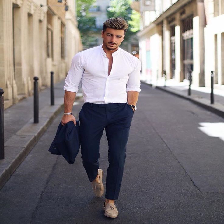

In [57]:

display_img(test_img_path)

### Output

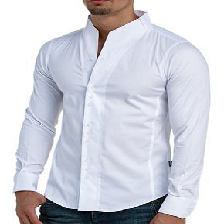

In [58]:
display_img(filenames[indices[0][0]])

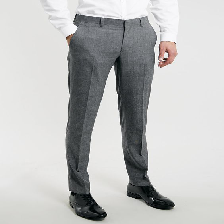

In [59]:
display_img(filenames[indices[0][1]])

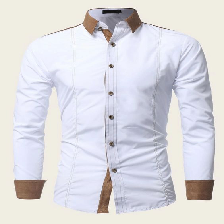

In [60]:
display_img(filenames[indices[0][4]])

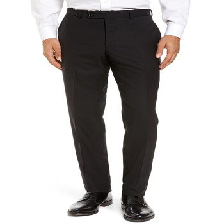

In [61]:
display_img(filenames[indices[0][-2]])

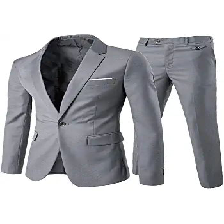

In [62]:
display_img(filenames[indices[0][-1]])